# День 2. Анализ данных

In [1]:
# Предварительные импорты

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# заново читаем excel
data = pd.read_excel('weather.xls', skiprows=6)
data.head(10)

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,05.12.2021 21:00,-3.0,748.2,762.4,1.1,92.0,"Штиль, безветрие",0,NaN,NaN,...,NaN,NaN,4.8,-4.1,1,12.0,NaN,NaN,NaN,NaN
1,05.12.2021 18:00,-1.8,747.1,761.4,0.8,92.0,"Штиль, безветрие",0,NaN,NaN,...,NaN,NaN,9,-3.0,2,12.0,NaN,NaN,NaN,NaN
2,05.12.2021 15:00,-1.2,746.3,760.5,0.4,85.0,"Штиль, безветрие",0,NaN,NaN,...,NaN,NaN,11,-3.5,NaN,NaN,NaN,NaN,NaN,NaN
3,05.12.2021 12:00,-2.0,745.9,760.1,0.6,90.0,"Штиль, безветрие",0,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,3,-3.4,NaN,NaN,NaN,NaN,NaN,NaN
4,05.12.2021 09:00,-3.3,745.3,759.5,0.6,92.0,"Штиль, безветрие",0,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,10,-4.4,0.9,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,9
5,05.12.2021 06:00,-3.7,744.7,758.9,-0.1,90.0,"Штиль, безветрие",0,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,NaN,-5.1,0.4,12.0,NaN,NaN,NaN,NaN
6,05.12.2021 03:00,-4.6,744.8,759.1,0.4,90.0,"Штиль, безветрие",0,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,3,-6.0,NaN,NaN,NaN,NaN,NaN,NaN
7,05.12.2021 00:00,-5.3,744.4,758.7,0.9,76.0,"Штиль, безветрие",0,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",20,-8.9,NaN,NaN,NaN,NaN,NaN,NaN
8,04.12.2021 21:00,-4.2,743.5,757.7,1.3,69.0,"Ветер, дующий с западо-юго-запада",2,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",20,-9.1,Следы осадков,12.0,NaN,NaN,NaN,NaN
9,04.12.2021 18:00,-3.7,742.2,756.4,1.5,71.0,"Ветер, дующий с запада",1,NaN,NaN,...,NaN,NaN,20,-8.2,Следы осадков,12.0,NaN,NaN,NaN,NaN


In [3]:
# добавляем новый столбец дат, приведённых к питоновому виду
data['dt'] = pd.to_datetime(data['Местное время в Москве (ВДНХ)'], dayfirst=True)
data['dt'].head(10)

0   2021-12-05 21:00:00
1   2021-12-05 18:00:00
2   2021-12-05 15:00:00
3   2021-12-05 12:00:00
4   2021-12-05 09:00:00
5   2021-12-05 06:00:00
6   2021-12-05 03:00:00
7   2021-12-05 00:00:00
8   2021-12-04 21:00:00
9   2021-12-04 18:00:00
Name: dt, dtype: datetime64[ns]

In [4]:
# удаляем строки, где температура не валидна
data = data[data['T'].notna()]

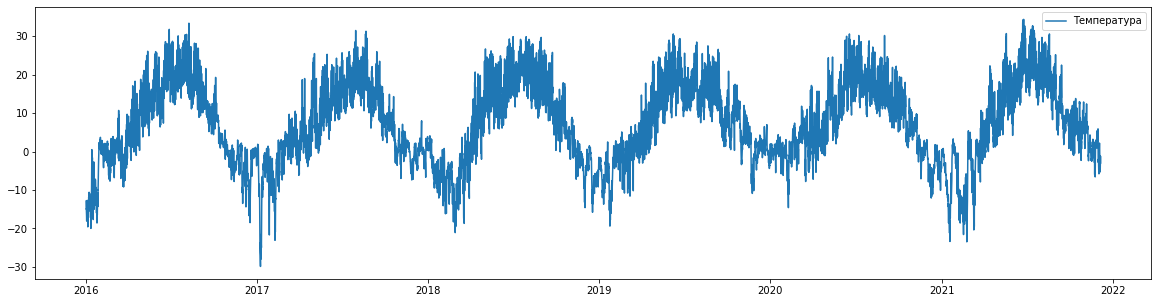

In [5]:
plt.figure(figsize=(20, 5))
plt.plot(data['dt'], data['T'], label='Температура')
plt.legend()

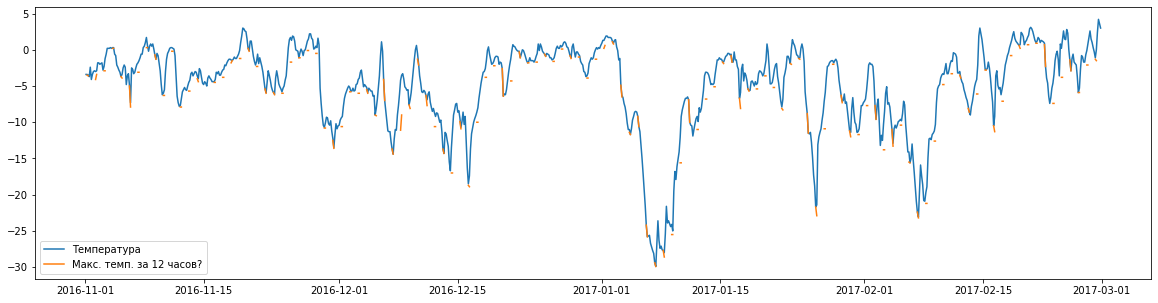

In [6]:
# составное условие из ДЗ1
# №1 внимание. Используется оператор & из pandas, а не and из Python
condition1 = (data['dt'] > '2016-11-01') & (data['dt'] < '2017-03-01')
data1 = data[condition1]

# №2 через between
condition2 = (data['dt'].between('2016-11-01', '2017-03-01'))
data2 = data[condition2]

plt.figure(figsize=(20, 5))
plt.plot(data1['dt'], data1['T'], label='Температура')
plt.plot(data2['dt'], data2['Tn'], label='Макс. темп. за 12 часов?')
plt.legend()

# Построение модели

Хотим прогнозировать температуру в зависимости от дня в году

1. разбить данные на тренировочную и тестовую выборки

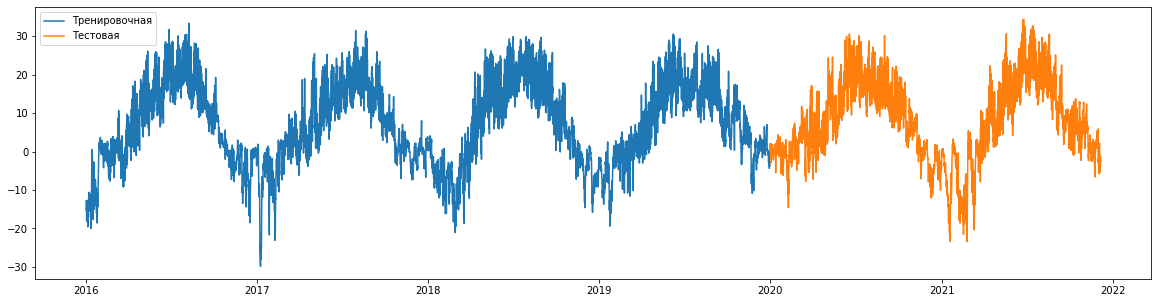

In [7]:
data_train = data[data['dt'] <  '2020-01-01']
data_test  = data[data['dt'] >= '2020-01-01']

plt.figure(figsize=(20, 5))
plt.plot(data_train['dt'], data_train['T'], label='Тренировочная')
plt.plot(data_test ['dt'], data_test ['T'], label='Тестовая')
plt.legend()

2. **Feature engineering** - работа с признаками

генерируем новые признаки (фичи, факторы) и/или преобразуем имеющиеся для прогноза величины

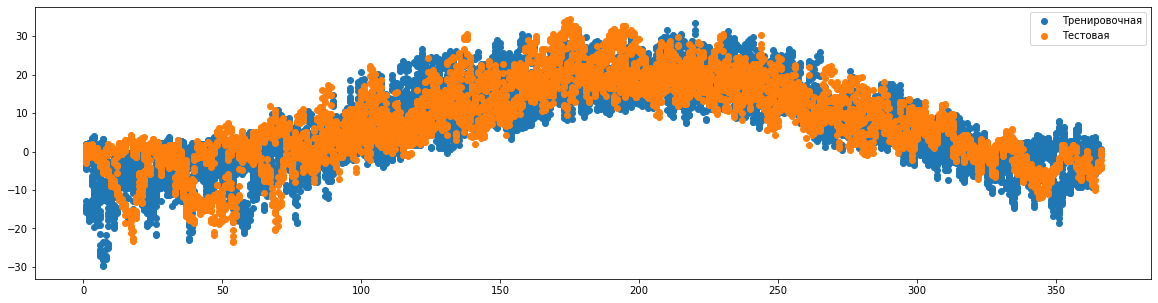

In [8]:
# создаём новый признак - день в году
data['dayofyear'] = data['dt'].dt.dayofyear
# заново разбиваем train-test, чтобы принялись изменения
data_train = data[data['dt'] <  '2020-01-01']
data_test  = data[data['dt'] >= '2020-01-01']

plt.figure(figsize=(20, 5))
plt.scatter(data_train['dayofyear'], data_train['T'], label='Тренировочная')
plt.scatter(data_test ['dayofyear'], data_test ['T'], label='Тестовая')
plt.legend()

### Линейная регрессия (самая простая модель)

$z = ax + b$

$\sum(yn - zn)^2$ -> min варьируя **a** и **b**
- **a** и **b** - параметры модели
- **y** - target (величина, к-ю хотим спрогнозировать)
- **X** - features (признаки) - факторы, по к-м мы хотим спрогнозировать что-то
    
Если признаков много, то линейная регрессия будет иметь вид:
$z = a1x1 + a2x2 + ... + b$

In [9]:
from sklearn.linear_model import LinearRegression

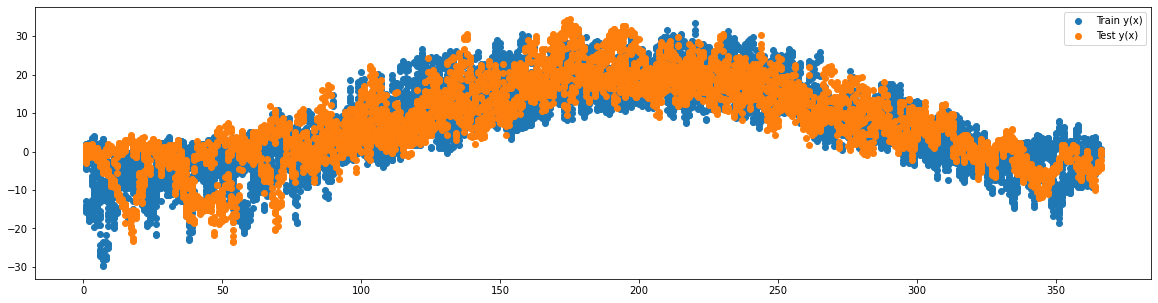

In [10]:
# для обучения модели нужно разделить выборку на фичи и таргет
# 2 датасета train-test x 2 features-target - создаём 4 переменных:
# X_train, y_train, X_test, y_test

# для простоты будем делать прогноз на одном факторе - номере дня в году
# но модель ожидает, что ей на вход придёт двумерная таблица - 
# поэтому создаём из колонки data['T'] полноценную pandas.DataFrame
X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']

X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']

# "y" оставляем столбцом, как есть
y_train = data_train['T']
y_test  = data_test ['T']

# и посмотрим график (то же самое)
plt.figure(figsize=(20, 5))
plt.scatter(X_train['dayofyear'], y_train, label='Train y(x)')
plt.scatter(X_test ['dayofyear'], y_test,  label='Test y(x)')
plt.legend()

### 1 модель: LinearRegression + dayofyear

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Сумма ошибок на тренировочных данных = 105.66810600668144
Сумма ошибок на тестовых данных = 99.12120639427488


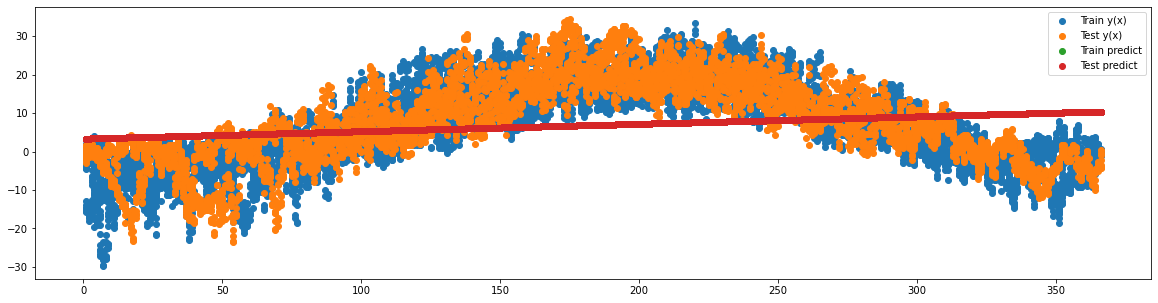

In [12]:
# посмотрим, какую мат. модель построила регрессия по данным, распечатаем
# прогноз для тренировочных данных
pred_train = model.predict(X_train)
# прогноз на данных, которые модель ещё не видела
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(X_train['dayofyear'], y_train, label='Train y(x)')
plt.scatter(X_test ['dayofyear'], y_test,  label='Test y(x)')

plt.scatter(X_train['dayofyear'], pred_train, label='Train predict')
plt.scatter(X_test ['dayofyear'], pred_test,  label='Test predict')
plt.legend()

# проверяем качество модели численно
# mean_squared_error - средняя сумма квадратов отклонений (меньше -> лучше)
# se - стандартная ошибка среднего
from sklearn.metrics import mean_squared_error

print('Сумма ошибок на тренировочных данных =', mean_squared_error(y_train, pred_train))
print('Сумма ошибок на тестовых данных =', mean_squared_error(y_test, pred_test))

## Что хочется изменить
- Данные сезонные и плавные, а линейная регрессия построила прямую
- 1 января почти не отличается от 31 декабря, но регрессия получилась восходящая

## Есть две опции:

1) придумать как изменить признаки для того, чтобы модель стала лучше

2) использовать другую модель.

Начинаем проверять гипотезы.

### *Гипотеза 1: хорошо сработает тригонометрическое преобразование признаков*

In [13]:
import numpy as np

In [14]:
# В каком диапазоне находятся данные признака dayofyear
data['dayofyear'].min(), data['dayofyear'].max()

(1, 366)

In [15]:
# переходим на интервал [0, 2pi]
scaled_dayofyear = ((data['dayofyear'] - 1) / 365) * 2 * np.pi

# cos_dayofyear - косинус дня в году
data['cos_dayofyear'] = np.cos(scaled_dayofyear)

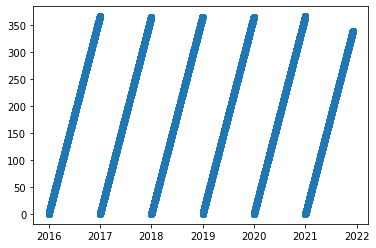

In [16]:
# график исходного признака
plt.scatter(data['dt'], data['dayofyear'])

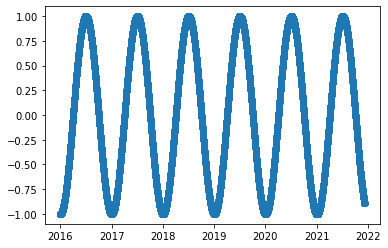

In [17]:
# график, сглаженный тригонометрической функцией
#plt.scatter(data['dt'], data['cos_dayofyear'])
plt.scatter(data['dt'], -data['cos_dayofyear']) # чтобы визуально было похоже, но это не нужно

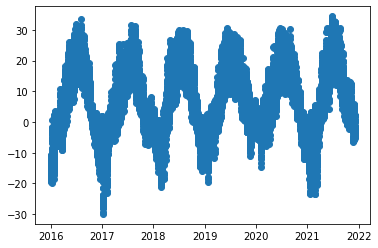

In [18]:
plt.scatter(data['dt'], data['T'])

## 2) LinearRegression + cos dayofyear
$z = a cos((x - 1)/365 * 2\pi) + b$

Сумма ошибок на тренировочных данных = 29.715405997019694
Сумма ошибок на тестовых данных = 32.394340535839646


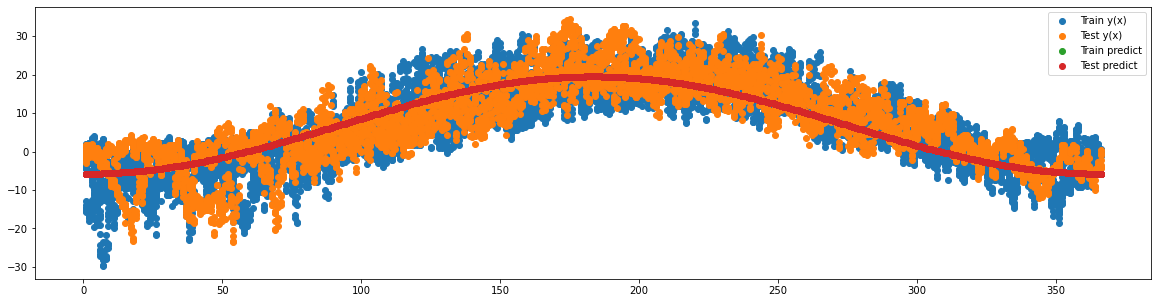

In [19]:
# переходим в радианы, создаём новую переменную с cos
data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 365 * 2 * np.pi)

data_train = data[data['dt'] <  '2020-01-01']
data_test  = data[data['dt'] >= '2020-01-01']
X_train = pd.DataFrame()
X_train['cos_dayofyear'] = data_train['cos_dayofyear']
X_test = pd.DataFrame()
X_test['cos_dayofyear'] = data_test['cos_dayofyear']
y_train = data_train['T']
y_test  = data_test ['T']

model = LinearRegression()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['dayofyear'], y_train, label='Train y(x)')
plt.scatter(data_test ['dayofyear'], y_test,  label='Test y(x)')

plt.scatter(data_train['dayofyear'], pred_train, label='Train predict')
plt.scatter(data_test ['dayofyear'], pred_test,  label='Test predict')
plt.legend()

# проверяем качество модели численно
# mean_squared_error - средняя сумма квадратов отклонений (меньше -> лучше)
# se - стандартная ошибка среднего
from sklearn.metrics import mean_squared_error

print('Сумма ошибок на тренировочных данных =', mean_squared_error(y_train, pred_train))
print('Сумма ошибок на тестовых данных =', mean_squared_error(y_test, pred_test))

## 3) Decision Tree + dayofyear

In [20]:
from sklearn.tree import DecisionTreeRegressor

Сумма ошибок на тренировочных данных = 21.154194319706576
Сумма ошибок на тестовых данных = 32.50162942772915


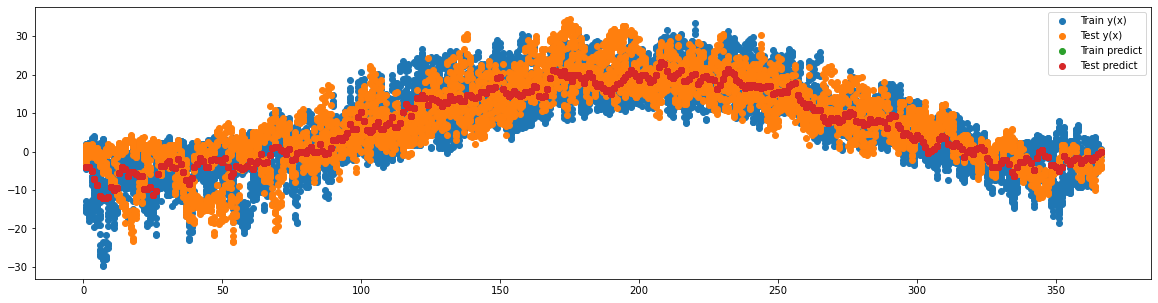

In [21]:
data_train = data[data['dt'] <  '2020-01-01']
data_test  = data[data['dt'] >= '2020-01-01']
X_train = pd.DataFrame()
X_train['dayofyear'] = data_train['dayofyear']
X_test = pd.DataFrame()
X_test['dayofyear'] = data_test['dayofyear']
y_train = data_train['T']
y_test  = data_test ['T']

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['dayofyear'], y_train, label='Train y(x)')
plt.scatter(data_test ['dayofyear'], y_test,  label='Test y(x)')

plt.scatter(data_train['dayofyear'], pred_train, label='Train predict')
plt.scatter(data_test ['dayofyear'], pred_test,  label='Test predict')
plt.legend()

print('Сумма ошибок на тренировочных данных =', mean_squared_error(y_train, pred_train))
print('Сумма ошибок на тестовых данных =', mean_squared_error(y_test, pred_test))

**Для 1 модели LinearRegression + dayofyear**
```
Сумма ошибок на тренировочных данных = 105.66810600668144
Сумма ошибок на тестовых данных = 99.12120639427488
```

**Для 2 модели LinearRegression + cos_sayofyear**
```
Сумма ошибок на тренировочных данных = 29.715405997019694
Сумма ошибок на тестовых данных = 32.394340535839646
```

**Для 3 модели Decision Tree + dayofyear**
```
Сумма ошибок на тренировочных данных = 21.154194319706576
Сумма ошибок на тестовых данных = 32.50162942772915
```

# Конкурсное ДЗ
***1) Протестировать качество модели Decision Tree + cos_dayofyear***

Сумма ошибок на тренировочных данных = 28.14382473636957
Сумма ошибок на тестовых данных = 34.4630862521015


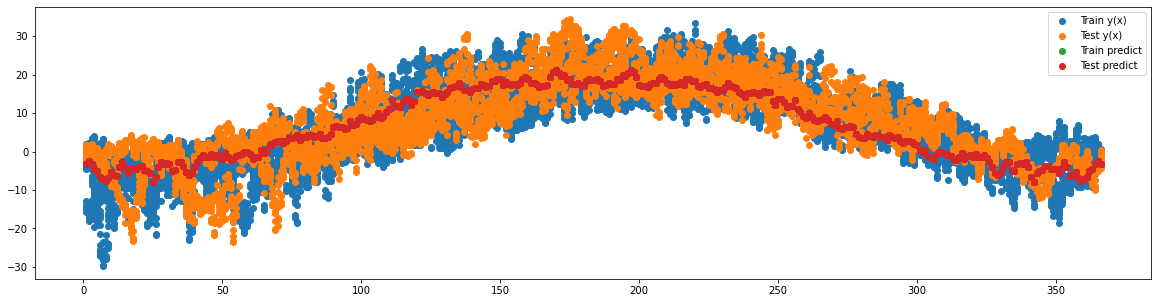

In [22]:
data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 365 * 2 * np.pi)

data_train = data[data['dt'] <  '2020-01-01']
data_test  = data[data['dt'] >= '2020-01-01']
X_train = pd.DataFrame()
X_train['cos_dayofyear'] = data_train['cos_dayofyear']
X_test = pd.DataFrame()
X_test['cos_dayofyear'] = data_test['cos_dayofyear']
y_train = data_train['T']
y_test  = data_test ['T']

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['dayofyear'], y_train, label='Train y(x)')
plt.scatter(data_test ['dayofyear'], y_test,  label='Test y(x)')

plt.scatter(data_train['dayofyear'], pred_train, label='Train predict')
plt.scatter(data_test ['dayofyear'], pred_test,  label='Test predict')
plt.legend()

print('Сумма ошибок на тренировочных данных =', mean_squared_error(y_train, pred_train))
print('Сумма ошибок на тестовых данных =', mean_squared_error(y_test, pred_test))

# Ответ №1.
**se** модели *Decision Tree* для фичи "косинус от дня года" выше, чем у модели *Decision Tree* с фичей "день года"

***2) Поиграть с признаками - добавить больше признаков***

Сумма ошибок на тренировочных данных = 21.162972140872274
Сумма ошибок на тестовых данных = 32.48018523098384


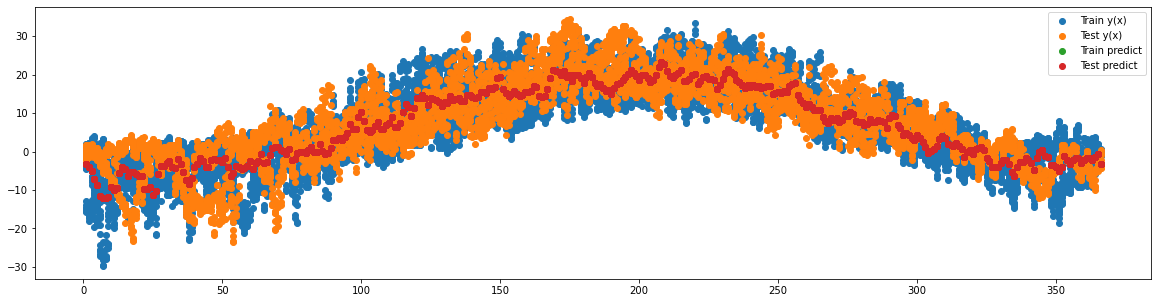

In [29]:
data['cos_dayofyear'] = np.cos((data['dayofyear'] - 1) / 365 * 2 * np.pi)
data['sin_dayofyear'] = np.sin((data['dayofyear'] - 1) / 365 * 2 * np.pi)

data_train = data[data['dt'] <  '2020-01-01']
data_test  = data[data['dt'] >= '2020-01-01']

X_train = pd.DataFrame()
#X_train['dayofyear'] = data_train['dayofyear']
X_train['cos_dayofyear'] = data_train['cos_dayofyear']
X_train['sin_dayofyear'] = data_train['sin_dayofyear']

X_test = pd.DataFrame()
#X_test['dayofyear'] = data_test['dayofyear']
X_test['cos_dayofyear'] = data_test['cos_dayofyear']
X_test['sin_dayofyear'] = data_test['sin_dayofyear']

y_train = data_train['T']
y_test  = data_test ['T']

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['dayofyear'], y_train, label='Train y(x)')
plt.scatter(data_test ['dayofyear'], y_test,  label='Test y(x)')

plt.scatter(data_train['dayofyear'], pred_train, label='Train predict')
plt.scatter(data_test ['dayofyear'], pred_test,  label='Test predict')
plt.legend()

print('Сумма ошибок на тренировочных данных =', mean_squared_error(y_train, pred_train))
print('Сумма ошибок на тестовых данных =', mean_squared_error(y_test, pred_test))

## Вывод 2. 
При использовании двух фич - *cos* и *sin* на модели DecisionTreeRegressor, **сумма ошибок среднего** на тестовых данных **стала** даже чуточку **меньше**, чем при использовании дня года (32.48 против 32.50).

***3) что насчет линейной модели c cos & sin?***

Сумма ошибок на тренировочных данных = 25.296821512187 2
Сумма ошибок на тестовых данных = 26.89042300754254


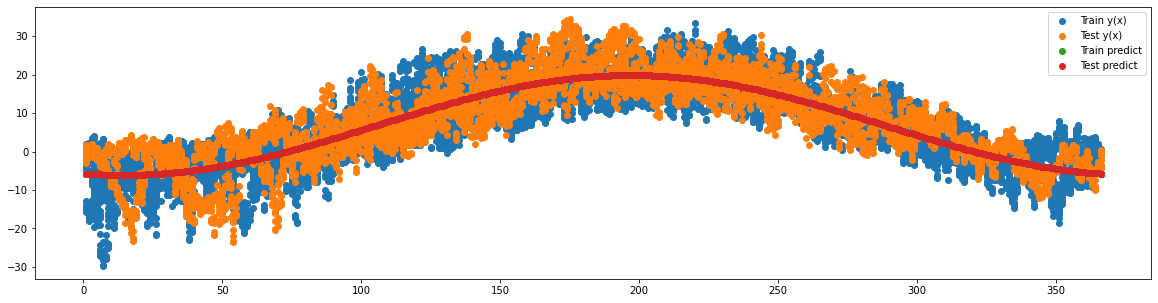

In [41]:
X_train = pd.DataFrame()
#X_train['dayofyear'] = data_train['dayofyear']
X_train['cos_dayofyear'] = data_train['cos_dayofyear']
X_train['sin_dayofyear'] = data_train['sin_dayofyear']

X_test = pd.DataFrame()
#X_test['dayofyear'] = data_test['dayofyear']
X_test['cos_dayofyear'] = data_test['cos_dayofyear']
X_test['sin_dayofyear'] = data_test['sin_dayofyear']

model = LinearRegression()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plt.figure(figsize=(20, 5))
plt.scatter(data_train['dayofyear'], y_train, label='Train y(x)')
plt.scatter(data_test ['dayofyear'], y_test,  label='Test y(x)')

plt.scatter(data_train['dayofyear'], pred_train, label='Train predict')
plt.scatter(data_test ['dayofyear'], pred_test,  label='Test predict')
plt.legend()

print('Сумма ошибок на тренировочных данных =', mean_squared_error(y_train, pred_train), 2)
print('Сумма ошибок на тестовых данных =', mean_squared_error(y_test, pred_test))

# Общий вывод (+ДЗ)
**1 LinearRegression + dayofyear**
```
Сумма ошибок на тренировочных данных = 105.66810600668144
Сумма ошибок на тестовых данных = 99.12120639427488
```

**2 LinearRegression + cos_dayofyear**
```
Сумма ошибок на тренировочных данных = 29.715405997019694
Сумма ошибок на тестовых данных = 32.394340535839646
```

**3 Decision Tree + dayofyear**
```
Сумма ошибок на тренировочных данных = 21.154194319706576
Сумма ошибок на тестовых данных = 32.50162942772915
```

**4 Decision Tree + cos_dayofyear**
```
Сумма ошибок на тренировочных данных = 21.162972140872274
Сумма ошибок на тестовых данных = 32.48018523098384
```

**5 LinearRegression + cos_dayofyear + sin_dayofyear**
```
Сумма ошибок на тренировочных данных = 25.296821512187
Сумма ошибок на тестовых данных = 26.89042300754254
```